## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV

## Importing the data

In [2]:
train=pd.read_csv('UNI.csv') # train data
test=pd.read_csv('unitest.csv') # test data

## Enquiring data

In [3]:
train.head() # viewing the structure of train data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [4]:
test.head() # viewing the structure of the test data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,1,514396,881378,3,115717,3,4,10,144,70,117
1,2,654594,749943,7,135999,1,2,13,161,51,70
2,3,559836,865594,4,142651,1,6,10,184,116,72
3,4,523784,870895,5,57223,4,2,14,170,76,102
4,5,547534,824478,4,51927,5,6,9,162,53,71


### Description of files:

<b>V.id:</b> Unique vehicle id

<b>On road old:</b> On road price of the vehicle when purchased from showroom in rupees

<b>New on road:</b> new on road price in rupees

<b>Years:</b> Vehicles age

<b>km:</b> total distance covered by vehicle in km

<b>Rating:</b> Overall rating of the new vehicle out of 5

<b>Condition:</b> current condition of the vehicle out of 10(note :- higher the number better the condition is)

<b>Economy:</b> current fuel economy of the vehicle per liter.

<b>Top speed:</b> current top speed of the vehicle indicated by dyno test.

<b>Hp:</b> horse power of the engine indicated by dyno test.

<b>Torque:</b> torque of the engine indicated by dyno test.

<b>Current price:</b> predicted price of the vehicle.

<h3>Statistical analysis of the train and test data</h3>

In [5]:
pandas_profiling.ProfileReport(train)

Number of variables,12
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,93.8 KiB
Average record size in memory,96.1 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<h3>Result of train data (pandas profiling)</h3>

*No missing values<br>
All numeric variables and no categorical variables<br>
No outlier data points in any feature variable*

*<b>Correlation</b><br>
km has **high** negative correlation with the current price<br>
on road old and on road now has **weak** positive correlation with the current price*

In [6]:
pandas_profiling.ProfileReport(test)

Number of variables,11
Number of observations,100
Total Missing (%),0.0%
Total size in memory,8.7 KiB
Average record size in memory,88.8 B
Numeric,11
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<h3>Result of test data (pandas profiling)</h3>

*No missing values<br>
No outlier data points in any feature variable*


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
v.id             1000 non-null int64
on road old      1000 non-null int64
on road now      1000 non-null int64
years            1000 non-null int64
km               1000 non-null int64
rating           1000 non-null int64
condition        1000 non-null int64
economy          1000 non-null int64
top speed        1000 non-null int64
hp               1000 non-null int64
torque           1000 non-null int64
current price    1000 non-null float64
dtypes: float64(1), int64(11)
memory usage: 93.8 KB


<h3>Result train info</h3>

<i>All are integer values</i><br>
<i>No object types hence no need for type conversion from object type to int/float type</i>

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
v.id           100 non-null int64
on road old    100 non-null int64
on road now    100 non-null int64
years          100 non-null int64
km             100 non-null int64
rating         100 non-null int64
condition      100 non-null int64
economy        100 non-null int64
top speed      100 non-null int64
hp             100 non-null int64
torque         100 non-null int64
dtypes: int64(11)
memory usage: 8.7 KB


## Plotting feature distribution

C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

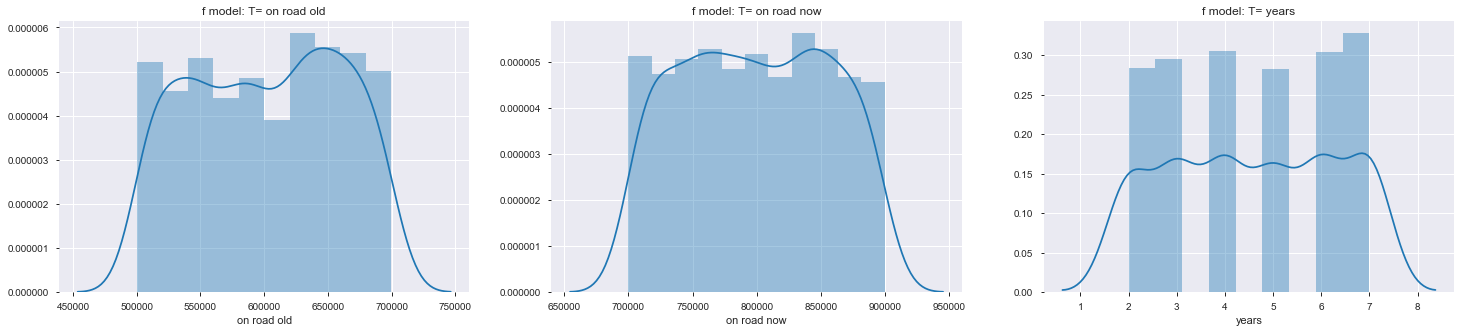

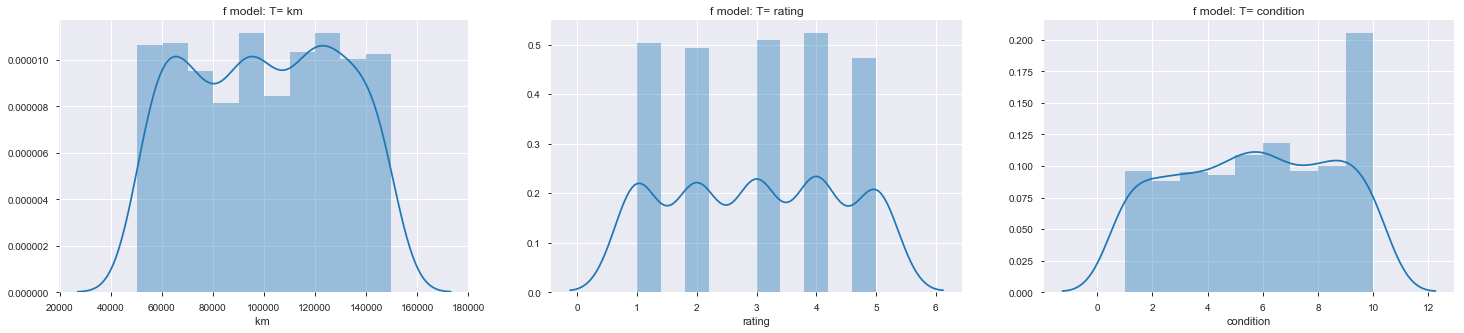

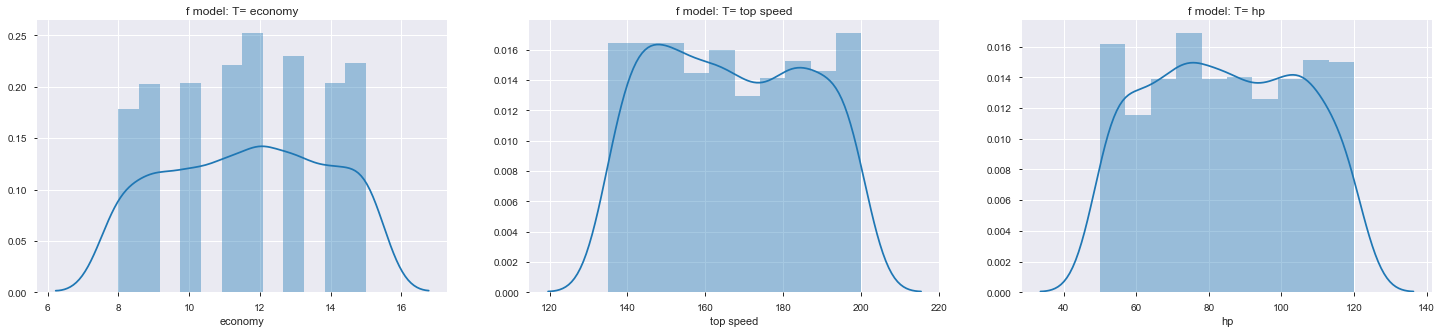

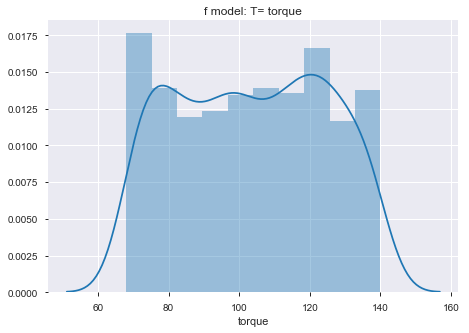

In [9]:
%matplotlib inline
vars = train.columns[1:-1:]
figures_per_time = 3
count = 0 
#y = train['current price']
for var in vars:
    x = train[var]
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,3)+1)
    sns.distplot(x);
    plt.title('f model: T= {}'.format(var))
    count+=1

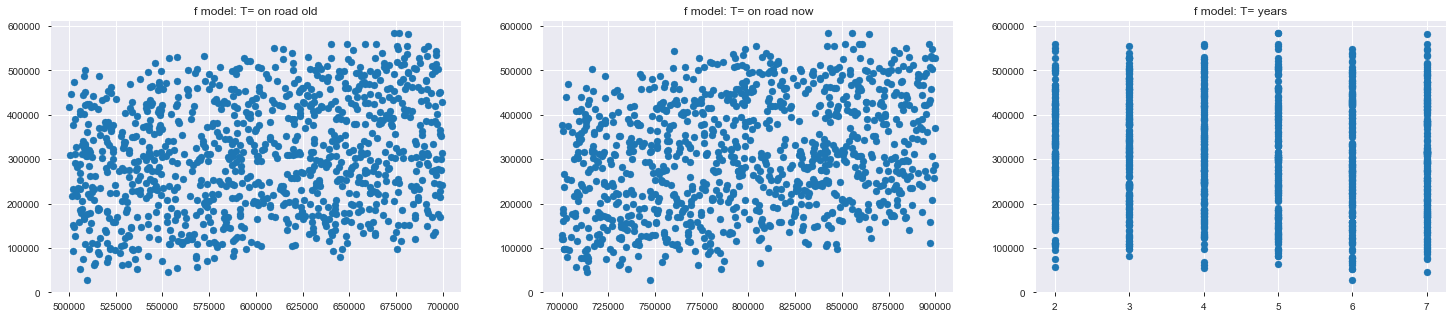

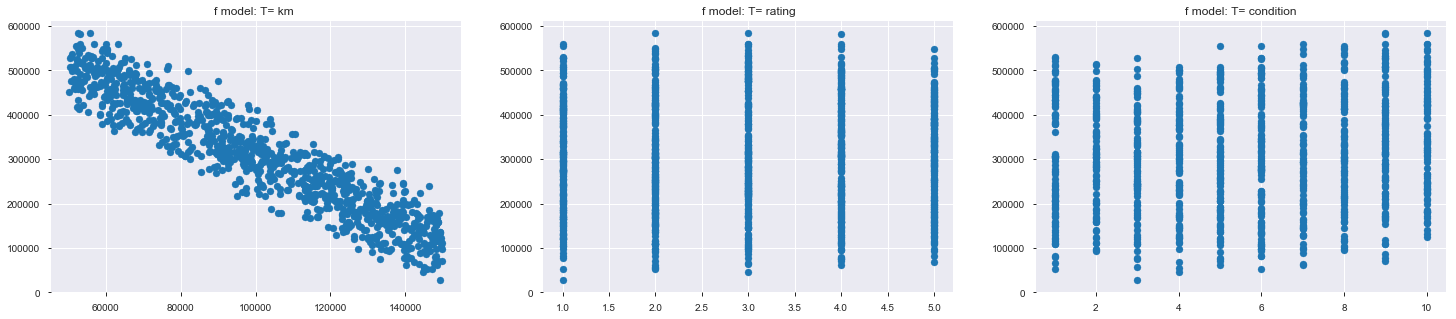

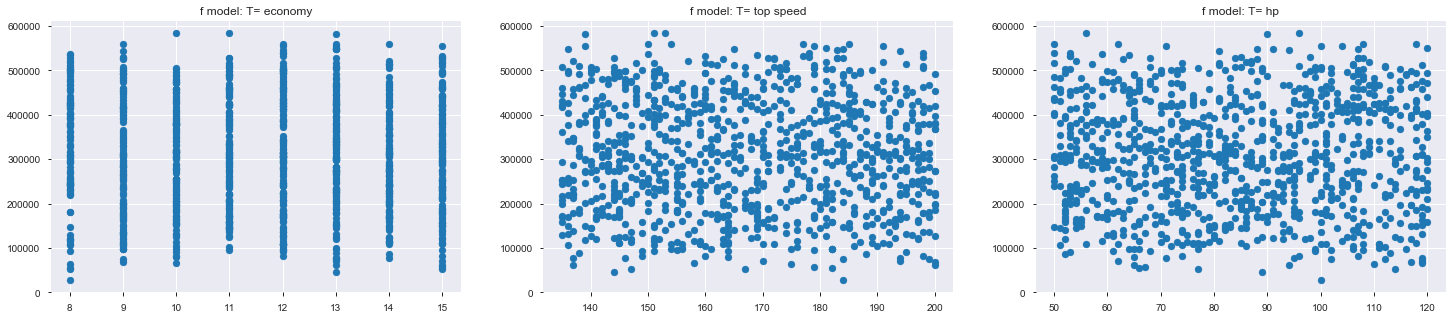

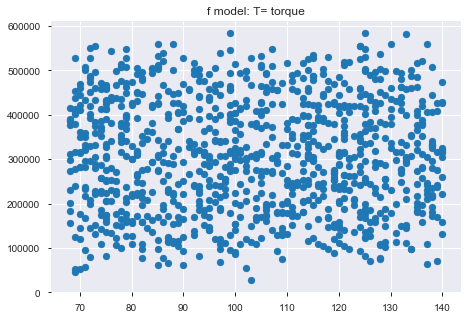

In [10]:
vars = train.columns[1:-1:]
# vars = numerical_features
figures_per_time = 3
count = 0 
y = train['current price']
for var in vars:
    x = train[var]
#     print(y.shape,x.shape)
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,3)+1)
    plt.scatter(x, y);
    plt.title('f model: T= {}'.format(var))
    count+=1

## Error metrics

In [11]:
from sklearn.metrics import mean_squared_error
def rmse(y_actual,y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

In [12]:
# Removing unnecessary whitespaces in train and test columns (creates problem while testing due to feature name mismatch)
train.rename(columns=lambda x: x.strip(), inplace=True)
test.rename(columns=lambda x: x.strip(), inplace=True)

## Train Test Split

In [13]:
train.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [14]:
train=train.drop(columns=['v.id'])

In [15]:
y=train['current price']
train=train.drop(columns=['current price'])
x=train

In [16]:
x.columns # features to be fed while training

Index(['on road old', 'on road now', 'years', 'km', 'rating', 'condition',
       'economy', 'top speed', 'hp', 'torque'],
      dtype='object')

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
# train test split where train=80% of data and test=20% of data

<h3>XGBoost</h3>

In [18]:
from xgboost import XGBRegressor

<h4>Model Description</h4>

We used GridSearchCV to quickly prototype various XGBoost models with different combinations of hyperparameter values to determine the best set of hyperparameters
* Used 4 fold cross validation to minimize error

In [20]:
gs_param_grid = {'max_depth': [3,4,5], 
                 'n_estimators' : [x for x in range(1000,5000,250)],
                 'learning_rate':[0.01,0.03,0.1]
                }
    
gbm = XGBRegressor()
grid_gbm = GridSearchCV(estimator=gbm, 
                        param_grid=gs_param_grid, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1
                       )
grid_gbm.fit(X_train,y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=1)]: Done 576 out of 576 | elapsed: 18.6min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'n_estimators': [1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750], 'learning_rate': [0.01, 0.03, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

<h4>Hyperparameter Tuning</h4>

* 0.03 learning rate yielded the best model amongst all variations

* No need to normalize in XGBoost model

* Passed max_depth values from 3 to 5 and found 3 to be optimal value

* Passed n_estimators from 1000 to 4750 with step size of 250 and found 4750 to be the ideal value 

* Changing colsample_bylevel, reg_alpha and reg_lambda did not have any significant affect on our model hence stuck to the default values

In [140]:
print('Best parameters found :', grid_gbm.best_params_)
print('Lowest RMSE found :', np.sqrt(np.abs(grid_gbm.best_score_)))

Best parameters found : {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 4750}
Lowest RMSE found : 8892.101517012052


<h4>Results obtained from all hyperparameter combinations using GridSearchCV</h4>

In [141]:
cvres = grid_gbm.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

10798.659356266115 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
10292.629420637226 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1250}
9986.692939563814 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1500}
9768.01510453088 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1750}
9631.554531666054 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 2000}
9505.803907317064 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 2250}
9387.535472877278 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 2500}
9292.167586978674 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 2750}
9229.009797649054 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 3000}
9168.3134696924 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 3250}
9125.999220151696 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 3500}
9083.337534421937 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 3750}
9043.092445954862 {'learning_rate': 0.01,

<h3>Error Plotting on the basis of varying hyperparameters</h3>

In [151]:
n_estimators=gs_param_grid['n_estimators']

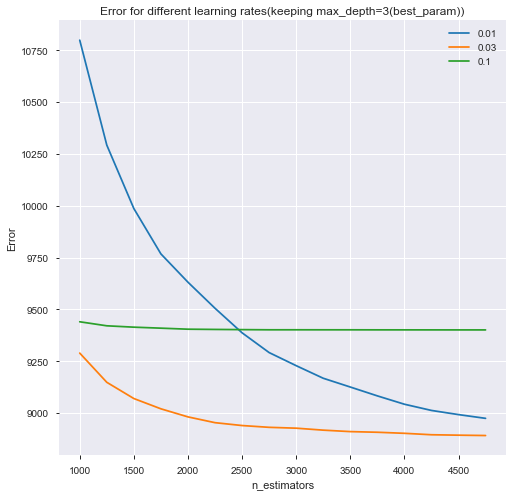

In [152]:
y=[]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    if params["max_depth"]==3:
        y.append(np.sqrt(-mean_score))

la=gs_param_grid['learning_rate']

y=np.array(y).reshape(3,len(n_estimators))

%matplotlib inline
plt.figure(figsize=(8,8))
for y_arr, label in zip(y, la):
    plt.plot(n_estimators, y_arr, label=label)

plt.title('Error for different learning rates(keeping max_depth=3(best_param))')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.show()

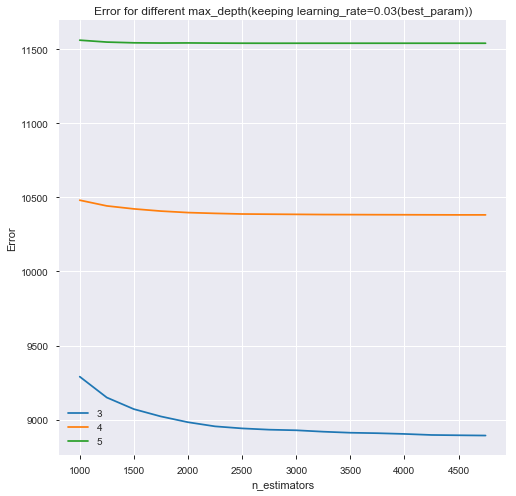

In [153]:
y=[]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    if params["learning_rate"]==0.03:
        y.append(np.sqrt(-mean_score))

y=np.array(y).reshape(3,len(n_estimators))

la=gs_param_grid['max_depth']

plt.figure(figsize=(8,8))
for y_arr, label in zip(y, la):
    plt.plot(n_estimators, y_arr, label=label)
plt.title('Error for different max_depth(keeping learning_rate=0.03(best_param))')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.show()

<h3>Test Predictions</h3>

In [154]:
predictions=grid_gbm.predict(X_test)
print("Error(rmse)=",rmse(y_test,predictions))

Error(rmse)= 8058.048011256591


## CSV Formation

In [155]:
pd.read_csv('sample.csv').head()

,v.id,currrent price
0,1,135854
1,2,180665
2,3,142825
3,4,198825
4,5,296572


In [156]:
test_ids=test['v.id']

In [157]:
test.drop(columns=['v.id'],inplace=True)

In [158]:
predict=grid_gbm.predict(test) # test value predictions

In [159]:
df=pd.DataFrame({'v.id':test_ids,'current price':predict})

In [160]:
df.to_csv('null_shredders_gridsearch_xgb.csv',index=False)